In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set()
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.cluster import KMeans,MiniBatchKMeans, AgglomerativeClustering 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, BaggingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, f1_score, accuracy_score, silhouette_samples, silhouette_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [320]:
data= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [321]:
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [322]:
data.shape

(1525, 9)

In [323]:
data.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [324]:
data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [326]:
data.duplicated().sum()

8

In [327]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [328]:
data.reset_index(drop = True, inplace = True)

In [329]:
data.shape

(1517, 9)

In [330]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [331]:
cat = []
num = []
for i in data.columns:
  if data[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)

In [332]:
ord = []
for i in num:
  if i != 'age':
    ord.append(i)
print(ord)

['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [333]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [334]:
data = data.replace(replace)

In [335]:
data["gender"].value_counts()

0    808
1    709
Name: gender, dtype: int64

In [336]:
data["vote"].value_counts()

0    1057
1     460
Name: vote, dtype: int64

In [337]:
round(data.skew(),2)

vote                       0.86
age                        0.14
economic.cond.national    -0.24
economic.cond.household   -0.14
Blair                     -0.54
Hague                      0.15
Europe                    -0.14
political.knowledge       -0.42
gender                     0.13
dtype: float64

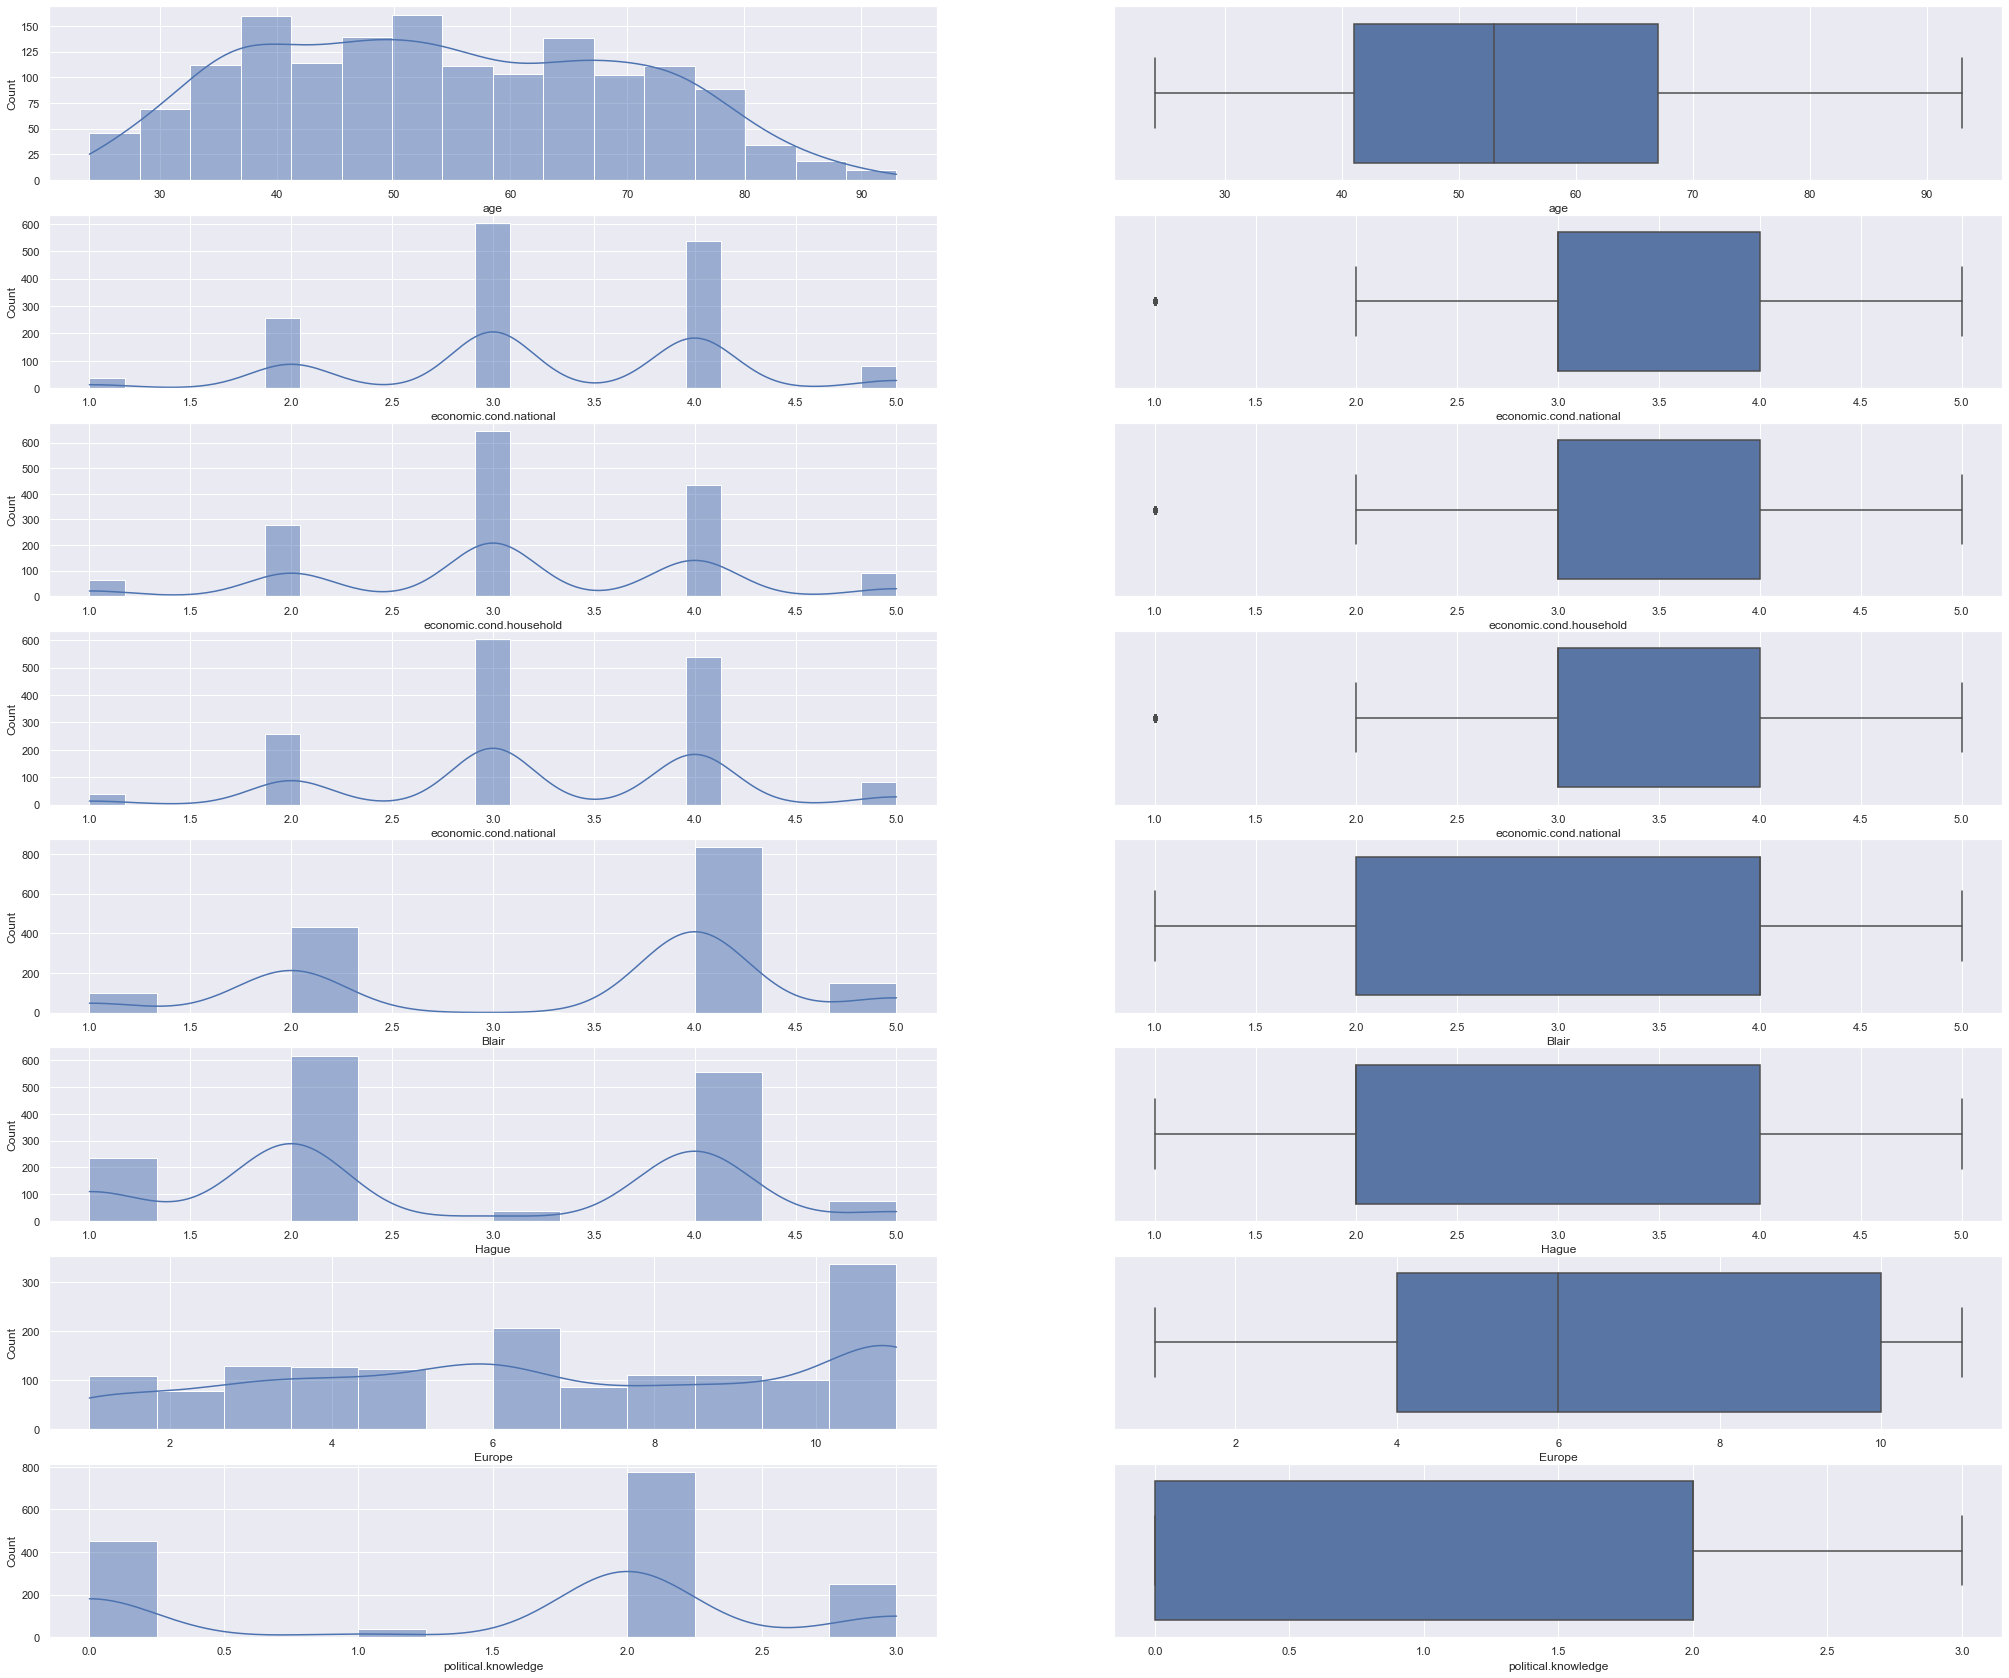

In [338]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(35,30)
sns.histplot(data['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=data, ax=axes[0][1])
sns.histplot(data['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=data , ax=axes[1][1])
sns.histplot(data['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=data, ax=axes[2][1])
sns.histplot(data['economic.cond.national'] , kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=data , ax=axes[3][1])
sns.histplot(data['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=data, ax=axes[4][1])
sns.histplot(data['Hague'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=data , ax=axes[5][1])
sns.histplot(data['Europe'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=data, ax=axes[6][1])
sns.histplot(data['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=data, ax=axes[7][1])




plt.show()

economic.cond.national %age Count
3    39.82
4    35.46
2    16.88
5     5.41
1     2.44
Name: economic.cond.national, dtype: float64
Average Score = 3.25


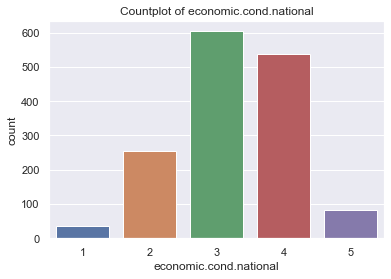



economic.cond.household %age Count
3    42.52
4    28.68
2    18.46
5     6.06
1     4.28
Name: economic.cond.household, dtype: float64
Average Score = 3.14


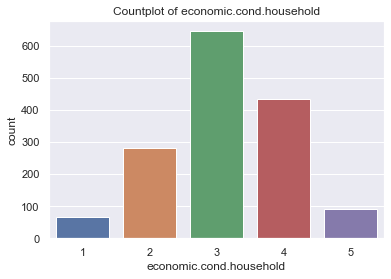



Blair %age Count
4    54.91
2    28.61
5    10.02
1     6.39
3     0.07
Name: Blair, dtype: float64
Average Score = 3.34


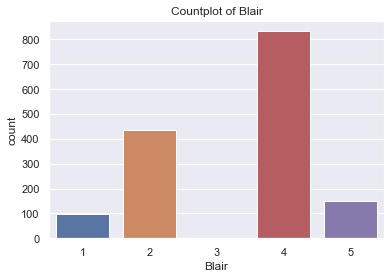



Hague %age Count
2    40.67
4    36.72
1    15.36
5     4.81
3     2.44
Name: Hague, dtype: float64
Average Score = 2.75


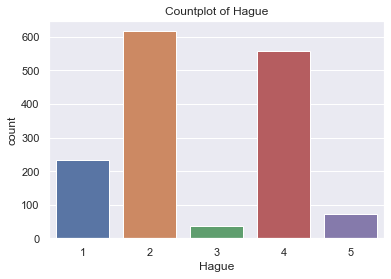



Europe %age Count
11    22.28
6     13.65
3      8.44
4      8.31
5      8.11
9      7.32
8      7.32
1      7.19
10     6.66
7      5.67
2      5.08
Name: Europe, dtype: float64
Average Score = 6.74


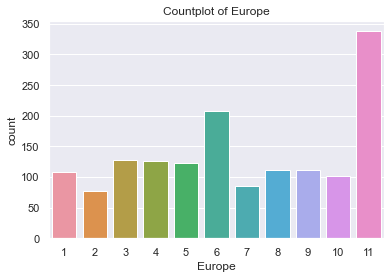



political.knowledge %age Count
2    51.15
0    29.93
3    16.41
1     2.50
Name: political.knowledge, dtype: float64
Average Score = 1.54


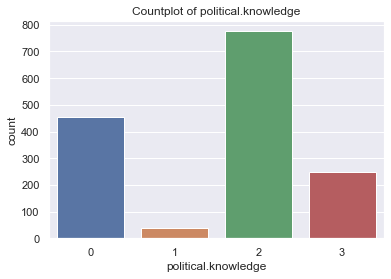

In [339]:
for i in ord:
  print(i, '%age Count')
  print(round(data[i].value_counts(normalize = True)*100,2))
  print('Average Score =', round(data[i].mean(),2))

  plt.title('Countplot of ' + str(i))
  sns.countplot(x = data[i]);
  plt.show()
  print('\n')

vote %age Count
0    69.68
1    30.32
Name: vote, dtype: float64


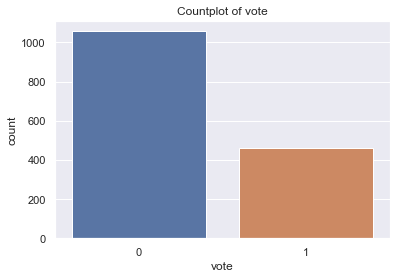

gender %age Count
0    53.26
1    46.74
Name: gender, dtype: float64


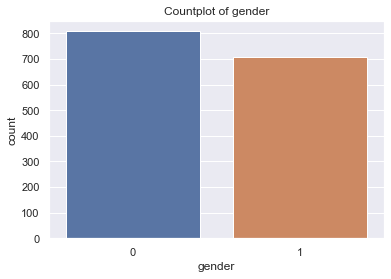

In [340]:
for i in cat:
  print(i, '%age Count')
  print(round(data[i].value_counts(normalize = True)*100,2))

  plt.title('Countplot of ' + str(i))
  sns.countplot(x = data[i]);
  plt.show()

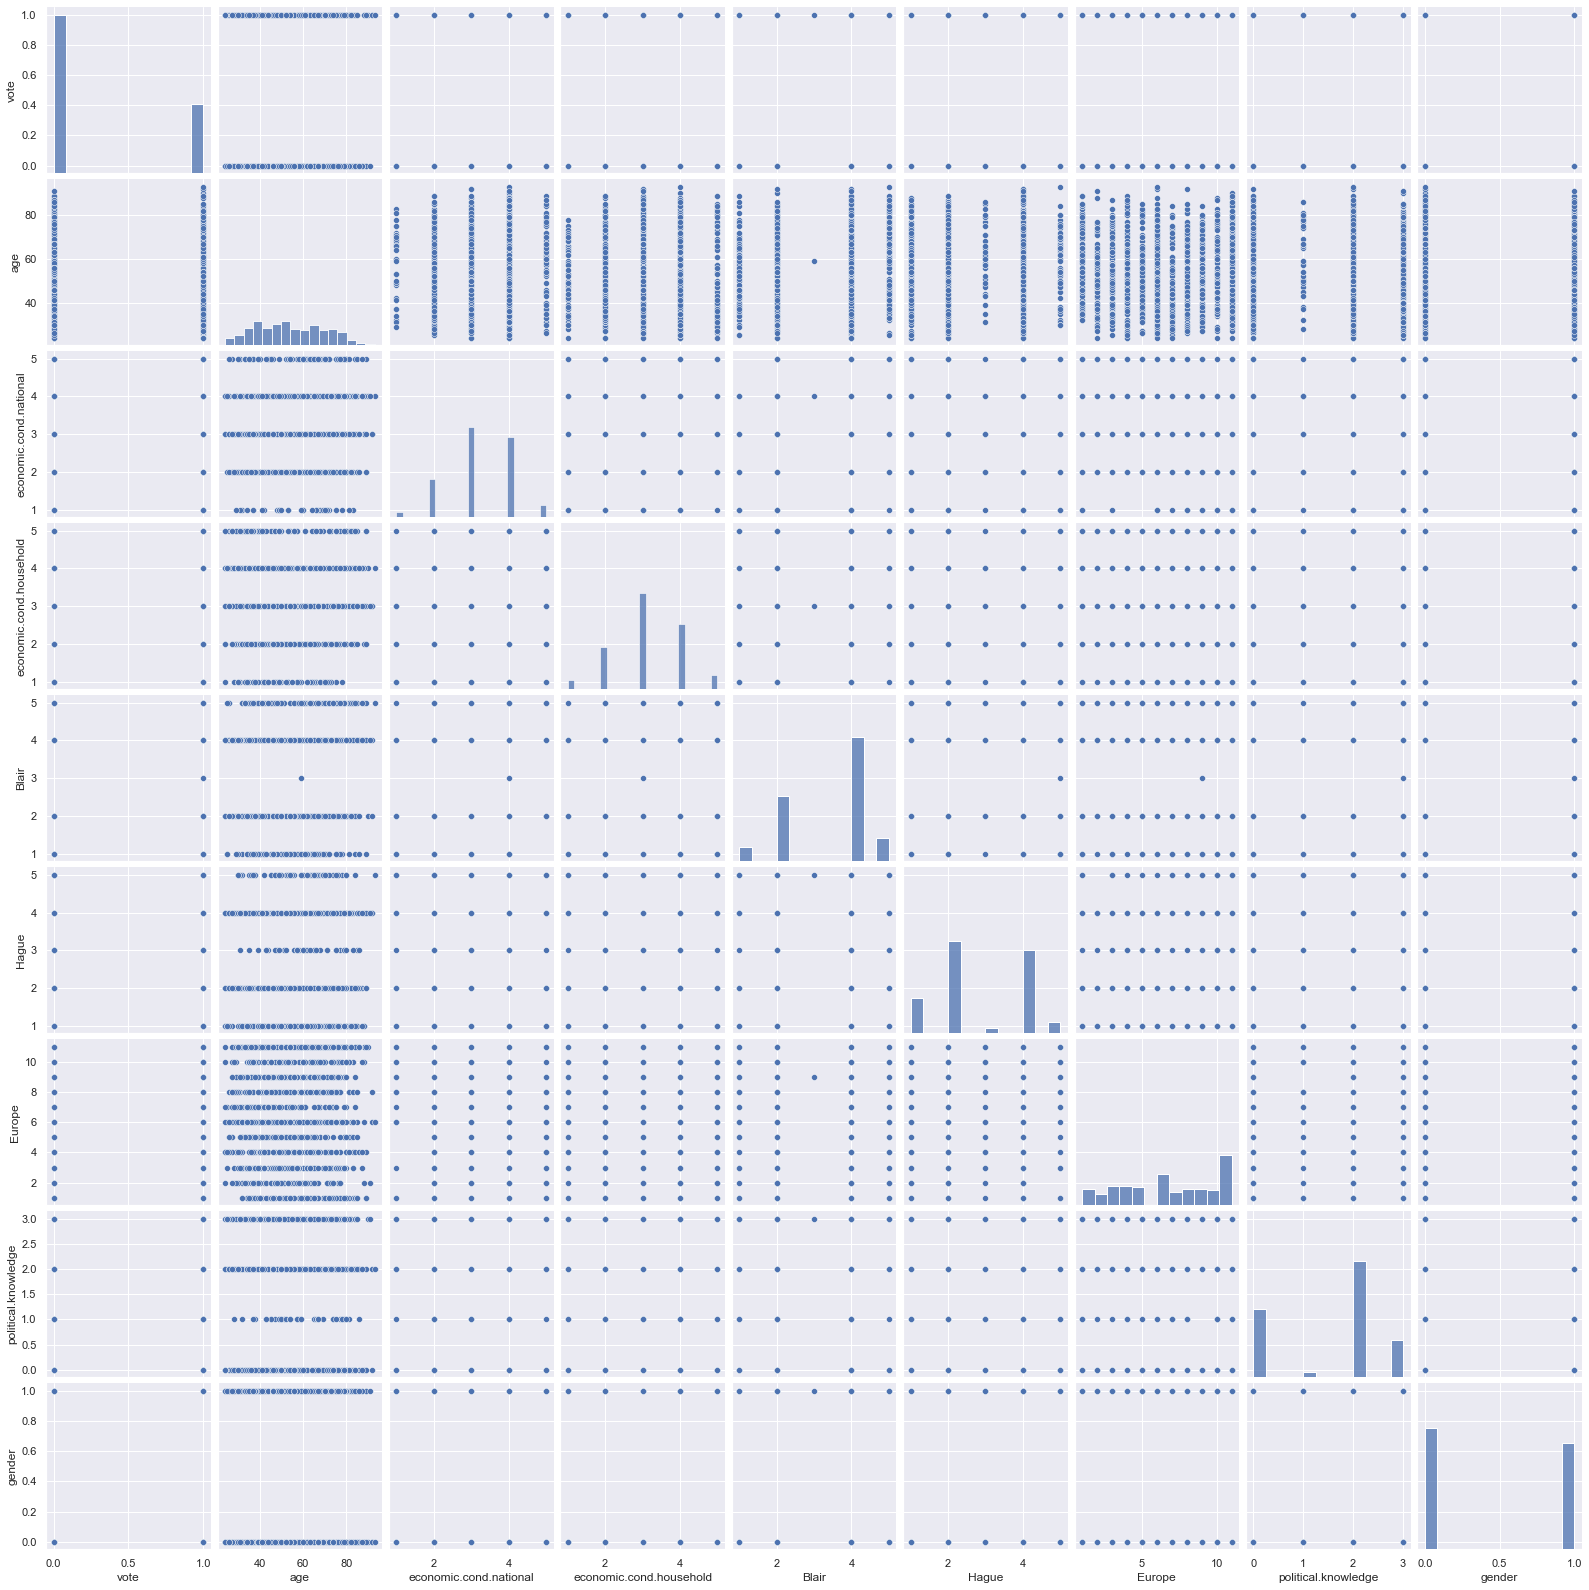

In [341]:
sns.pairplot(data)

<AxesSubplot:xlabel='vote', ylabel='age'>

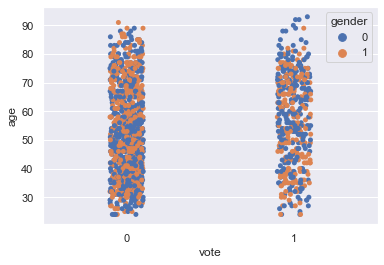

In [342]:
sns.stripplot(data["vote"],data["age"],hue=data["gender"])

gender,0,1
vote,,
0,68.19,71.37
1,31.81,28.63


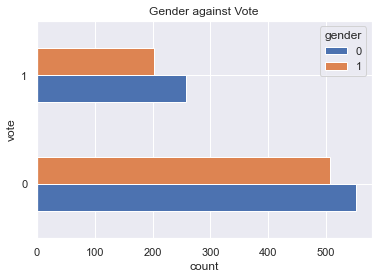

In [343]:
pd.crosstab(data['vote'], data['gender']).plot(kind = 'barh')
plt.title('Gender against Vote')
plt.xlabel('count');
round(pd.crosstab(data['vote'], data['gender'], normalize = 'columns') * 100, 2)

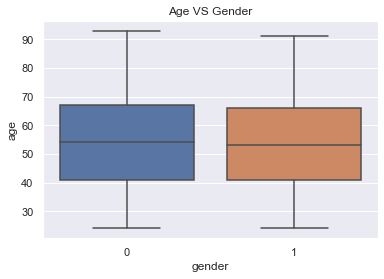

In [344]:
plt.title('Age VS Gender');
sns.boxplot(data = data, y = 'age', x = 'gender');

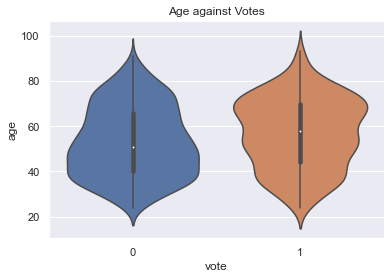

In [345]:
plt.title('Age against Votes');
sns.violinplot(data = data, y = 'age', x = 'vote');

economic.cond.national,1,2,3,4,5
vote,,,,,
0,43.24,45.31,67.05,83.09,89.02
1,56.76,54.69,32.95,16.91,10.98


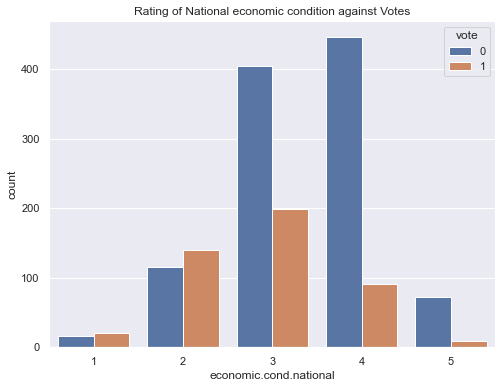

In [346]:
plt.figure(figsize = [8, 6])
plt.title('Rating of National economic condition against Votes');
sns.countplot(data = data, x = 'economic.cond.national', hue = 'vote');
round(pd.crosstab(data['vote'], data['economic.cond.national'], normalize = 'columns') * 100, 2)

economic.cond.household,1,2,3,4,5
vote,,,,,
0,56.92,55.0,69.46,80.23,75.0
1,43.08,45.0,30.54,19.77,25.0


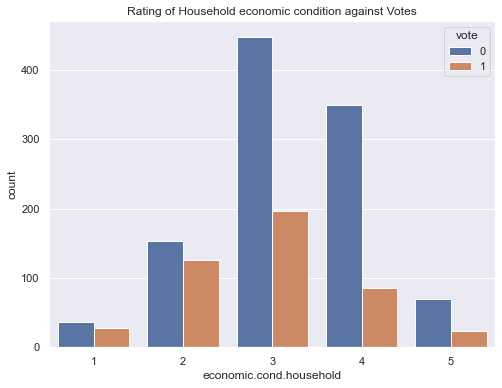

In [347]:
plt.figure(figsize = [8, 6])
plt.title('Rating of Household economic condition against Votes');
sns.countplot(data = data, x = 'economic.cond.household', hue = 'vote');
round(pd.crosstab(data['vote'], data['economic.cond.household'], normalize = 'columns') * 100, 2)

Blair,1,2,3,4,5
vote,,,,,
0,39.18,44.7,0.0,81.15,98.03
1,60.82,55.3,100.0,18.85,1.97


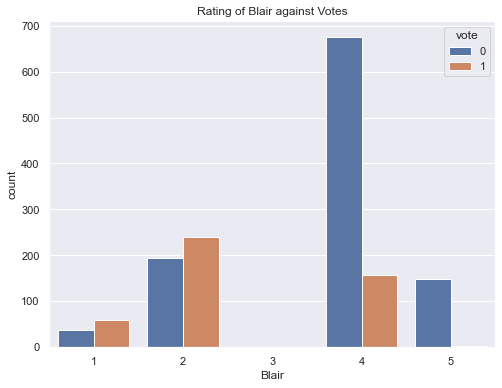

In [348]:
plt.figure(figsize = [8, 6])
plt.title('Rating of Blair against Votes');
sns.countplot(data = data, x = 'Blair', hue = 'vote');
round(pd.crosstab(data['vote'], data['Blair'], normalize = 'columns') * 100, 2)

Hague,1,2,3,4,5
vote,,,,,
0,95.28,84.6,75.68,48.65,19.18
1,4.72,15.4,24.32,51.35,80.82


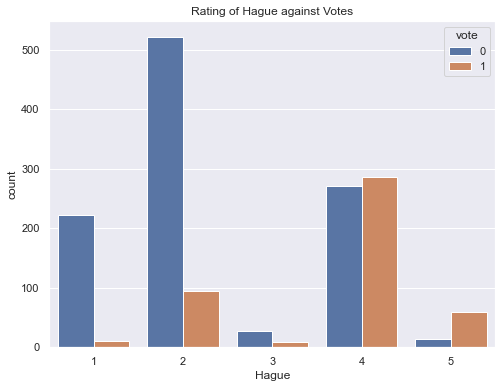

In [349]:
plt.figure(figsize = [8, 6])
plt.title('Rating of Hague against Votes');
sns.countplot(data = data, x = 'Hague', hue = 'vote');
round(pd.crosstab(data['vote'], data['Hague'], normalize = 'columns') * 100, 2)

Europe,1,2,3,4,5,6,7,8,9,10,11
vote,,,,,,,,,,,
0,95.41,92.21,89.06,85.71,83.74,83.09,62.79,56.76,49.55,46.53,49.11
1,4.59,7.79,10.94,14.29,16.26,16.91,37.21,43.24,50.45,53.47,50.89


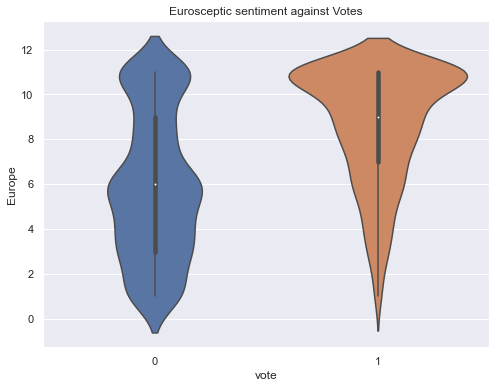

In [350]:
plt.figure(figsize = [8, 6])
plt.title('Eurosceptic sentiment against Votes');
sns.violinplot(data = data, y = 'Europe', x = 'vote');
round(pd.crosstab(data['vote'], data['Europe'], normalize = 'columns') * 100, 2)

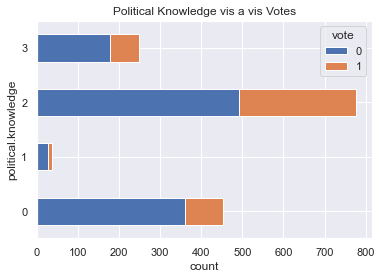

In [351]:
pk = round(pd.crosstab(data['political.knowledge'], data['vote']), 2)
pk.plot.barh(stacked = True)
plt.xlabel('count')
plt.title('Political Knowledge vis a vis Votes');

<AxesSubplot:xlabel='Blair', ylabel='Count'>

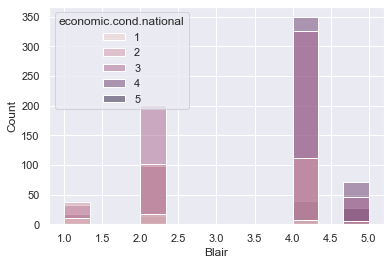

In [352]:
sns.histplot(data =data , x = "Blair", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

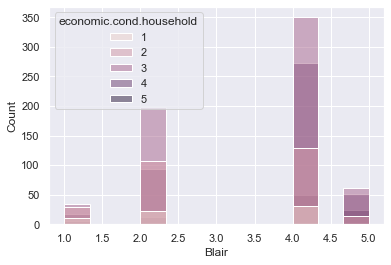

In [353]:
sns.histplot(data =data , x = "Blair", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

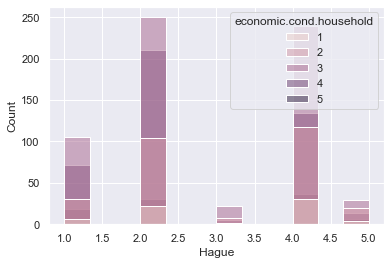

In [354]:
sns.histplot(data =data , x = "Hague", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

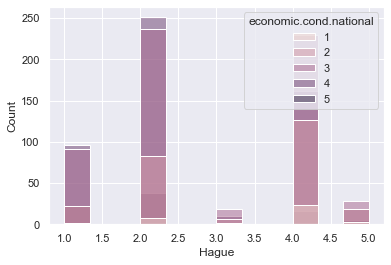

In [355]:
sns.histplot(data =data , x = "Hague", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

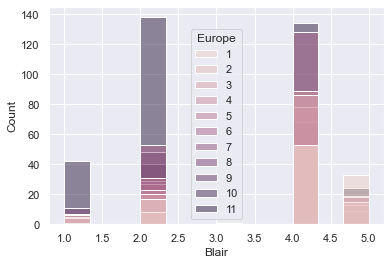

In [356]:
sns.histplot(data =data , x = "Blair", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

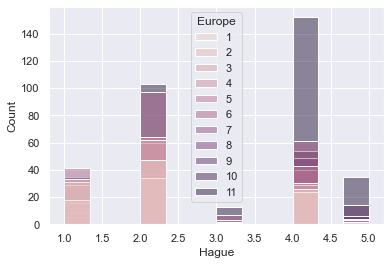

In [357]:
sns.histplot(data =data , x = "Hague", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

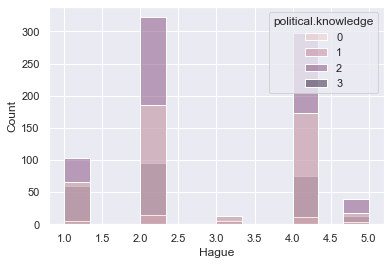

In [358]:
sns.histplot(data =data , x = "Hague", hue = "political.knowledge")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

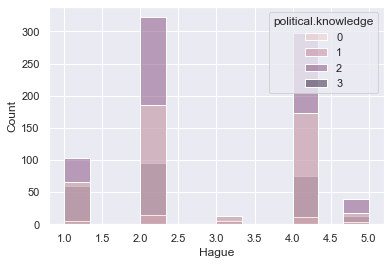

In [359]:
sns.histplot(data =data , x = "Hague", hue = "political.knowledge")

In [360]:
covMatrix = np.cov(data,bias=True)
print (covMatrix)

[[168.69135802 135.48148148 133.34567901 ... 141.51851852 234.92592593
  289.54320988]
 [135.48148148 110.         107.40740741 ... 114.11111111 191.11111111
  235.14814815]
 [133.34567901 107.40740741 105.72839506 ... 112.03703704 185.40740741
  228.60493827]
 ...
 [141.51851852 114.11111111 112.03703704 ... 119.55555556 196.88888889
  242.96296296]
 [234.92592593 191.11111111 185.40740741 ... 196.88888889 338.
  414.59259259]
 [289.54320988 235.14814815 228.60493827 ... 242.96296296 414.59259259
  509.50617284]]


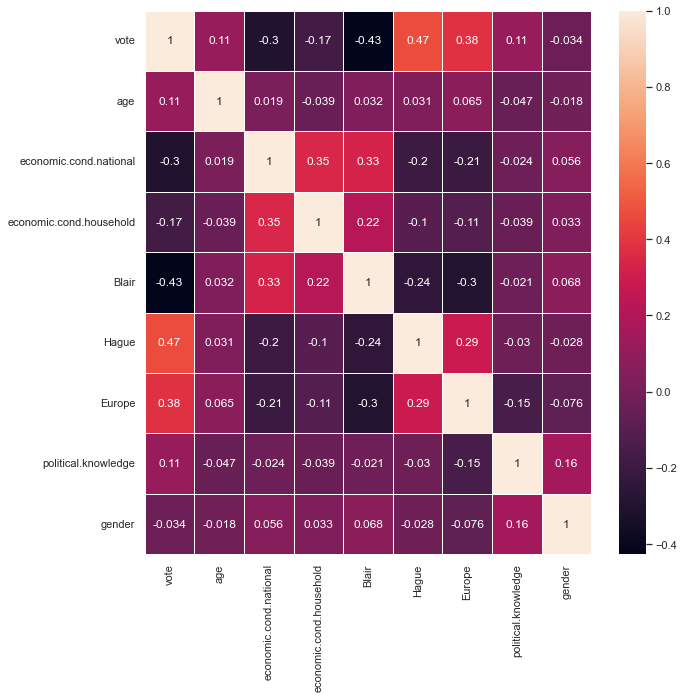

In [361]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(data.corr(), annot=True,linewidth = 1)

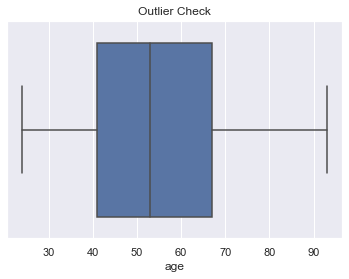

In [362]:
plt.title('Outlier Check')
sns.boxplot(data = data, x = 'age');

In [363]:
data = pd.get_dummies(data, columns = ['gender'], drop_first = True)
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


In [364]:
a = round(data[num].describe().T, 2)
a['range'] = a['max'] - a['min']
a[['range', 'std']]

,range,std
age,69.0,15.70
economic.cond.national,4.0,0.88
economic.cond.household,4.0,0.93
Blair,4.0,1.17
Hague,4.0,1.23
Europe,10.0,3.30
political.knowledge,3.0,1.08


In [365]:
scaler = MinMaxScaler().fit(data[num])
data_minmax = scaler.transform(data[num])
data[num] = pd.DataFrame(data_minmax, columns = data[num].columns)
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
0,0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0
1,0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1
2,0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1
3,0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0
4,0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1


In [366]:
x = data.drop("vote",axis = 1)
y = data.pop("vote")

In [367]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

In [368]:
x_train.shape

(1061, 8)

In [369]:
y_train.shape

(1061,)

In [370]:
x_test.shape

(456, 8)

In [371]:
y_test.shape

(456,)

In [372]:
lr = LogisticRegression(solver  = 'lbfgs') #default solver
lr.fit(x_train, y_train)

LogisticRegression()

In [373]:
y_train_predict=lr.predict(x_train)

In [374]:
y_test_lr = lr.predict(x_test)

In [375]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       754
           1       0.76      0.63      0.69       307

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



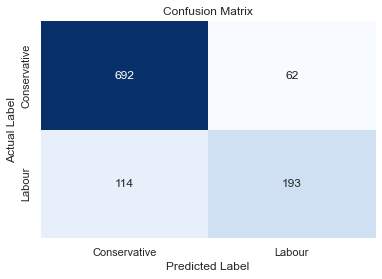

In [376]:
sns.heatmap(confusion_matrix(y_train, y_train_predict), annot = True, fmt = 'd', cbar = False, cmap = 'Blues', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

In [377]:
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,y_test_lr))

[[269  34]
 [ 45 108]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       303
           1       0.76      0.71      0.73       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



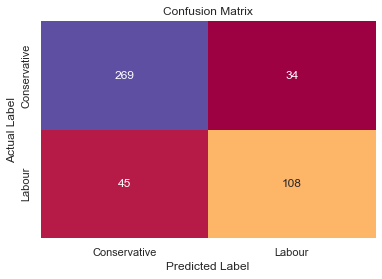

In [378]:
sns.heatmap(confusion_matrix(y_test, y_test_lr), annot = True, fmt = 'd', cbar = False, cmap = 'Spectral', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

In [379]:
print(mean_squared_error(y_train_predict, y_train))

0.16588124410933083


In [380]:
print(mean_squared_error(y_test_lr, y_test))

0.17324561403508773


AUC: 0.890


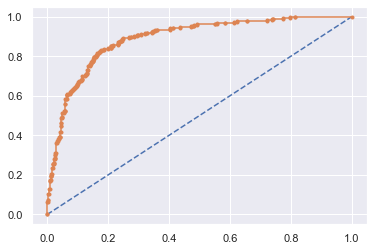

In [381]:
# AUC and ROC for the training data
probs = lr.predict_proba(x_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.884


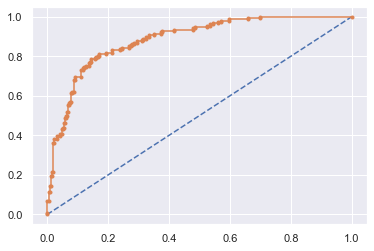

In [382]:
# AUC and ROC for the test data
probs = lr.predict_proba(x_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [383]:
train_accuracy = accuracy_score(y_train, y_train_predict)

print(f'Training Accuracy: {train_accuracy:.7f}')

Training Accuracy: 0.8341188


In [384]:
test_accuracy = accuracy_score(y_test, y_test_lr)

print(f'Testing Accuracy: {test_accuracy:.7f}')

Testing Accuracy: 0.8267544


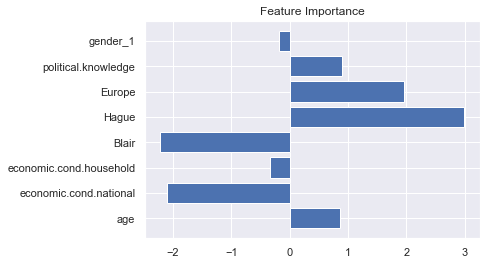

In [390]:
plt.title('Feature Importance')
plt.barh(x_train.columns, lr.coef_[0]);

In [385]:
lda = LinearDiscriminantAnalysis()

In [386]:
lda = lda.fit(x_train,y_train)

In [394]:
y_train_lda = lda.predict(x_train)
y_test_lda = lda.predict(x_test)

In [395]:
print(confusion_matrix(y_train, y_train_lda))
print(classification_report(y_train, y_train_lda))

[[685  69]
 [107 200]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



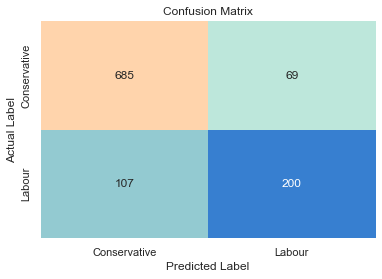

In [397]:
sns.heatmap(confusion_matrix(y_train, y_train_lda), annot = True, fmt = 'd', cbar = False, cmap = 'icefire', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC: 0.889


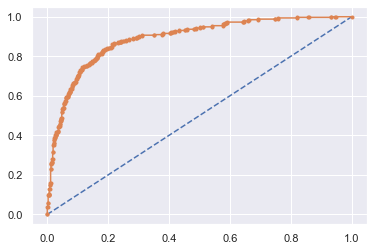

In [99]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

In [399]:
print(confusion_matrix(y_test, y_test_lda))
print(classification_report(y_test, y_test_lda))

[[269  34]
 [ 42 111]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



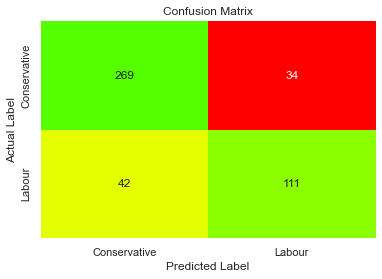

In [401]:
sns.heatmap(confusion_matrix(y_test, y_test_lda), annot = True, fmt = 'd', cbar = False, cmap = 'prism', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC: 0.888


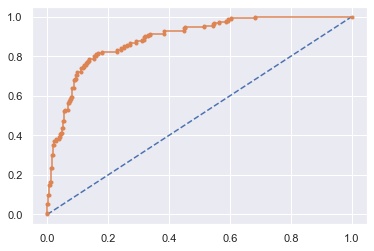

In [402]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [407]:
train_accuracy = accuracy_score(y_train, y_train_lda)

print(f'Training Accuracy: {train_accuracy:.7f}')

Training Accuracy: 0.8341188


In [408]:
test_accuracy = accuracy_score(y_test, y_test_lda)

print(f'Testing Accuracy: {test_accuracy:.7f}')

Testing Accuracy: 0.8333333


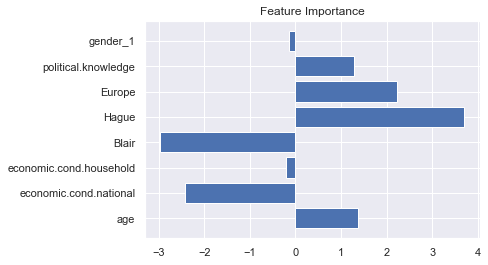

In [404]:
plt.title('Feature Importance')
plt.barh(x_train.columns, lda.coef_[0]);

In [440]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [441]:
knn = knn.fit(x_train,y_train)

In [442]:
y_train_knn = knn.predict(x_train)
y_test_knn = knn.predict(x_test)

In [443]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.8179824561403509

In [444]:
print(classification_report(y_train, y_train_knn))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       754
           1       0.77      0.72      0.74       307

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.86      0.85      1061



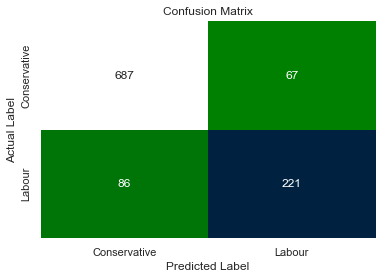

In [445]:
sns.heatmap(confusion_matrix(y_train, y_train_knn), annot = True, fmt = 'd', cbar = False, cmap = 'ocean', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC: 0.930


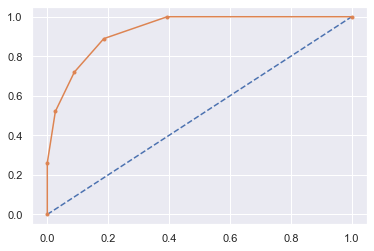

In [446]:
# AUC and ROC for the training data
probs = knn.predict_proba(x_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [447]:
print(classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       303
           1       0.74      0.70      0.72       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



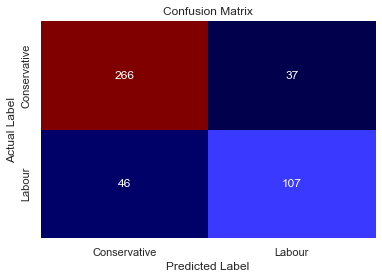

In [448]:
sns.heatmap(confusion_matrix(y_test, y_test_knn), annot = True, fmt = 'd', cbar = False, cmap = 'seismic', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC: 0.873


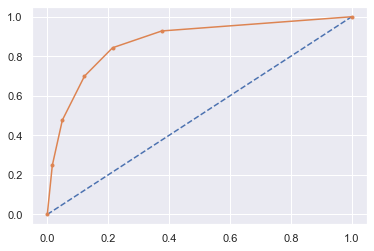

In [449]:
# AUC and ROC for the test data
probs = knn.predict_proba(x_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [450]:
train_accuracy = accuracy_score(y_train, y_train_knn)

print(f'Training Accuracy: {train_accuracy:.7f}')

Training Accuracy: 0.8557964


In [451]:
test_accuracy = accuracy_score(y_test, y_test_knn)

print(f'Testing Accuracy: {test_accuracy:.7f}')

Testing Accuracy: 0.8179825


In [452]:
nb=GaussianNB()

In [453]:
nb= nb.fit(x_train, y_train)

In [456]:
y_train_gnb = nb.predict(x_train)
y_test_gnb = nb.predict(x_test)

In [457]:
print(confusion_matrix(y_train, y_train_gnb))
print(classification_report(y_train, y_train_gnb))

[[675  79]
 [ 96 211]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [464]:
print(confusion_matrix(y_test, y_test_gnb))
print(classification_report(y_test, y_test_gnb))

[[263  40]
 [ 41 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



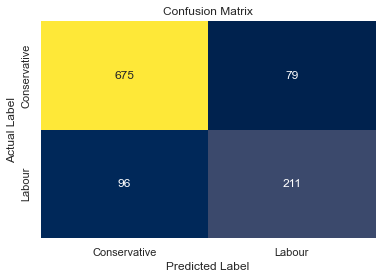

In [460]:
sns.heatmap(confusion_matrix(y_train, y_train_gnb), annot = True, fmt = 'd', cbar = False, cmap = 'cividis', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

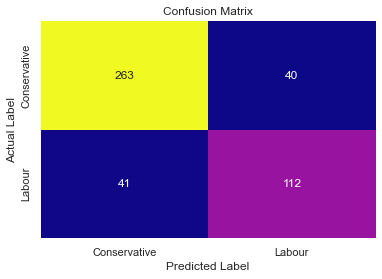

In [463]:
sns.heatmap(confusion_matrix(y_test, y_test_gnb), annot = True, fmt = 'd', cbar = False, cmap = 'plasma', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC: 0.886


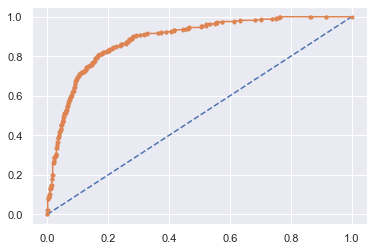

In [114]:
# AUC and ROC for the training data
probs = nb.predict_proba(x_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.885


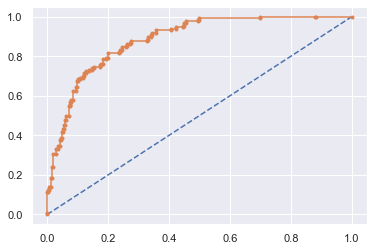

In [115]:
# AUC and ROC for the test data
probs = nb.predict_proba(x_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [465]:
train_accuracy = accuracy_score(y_train, y_train_gnb)

print(f'Training Accuracy: {train_accuracy:.7f}')

Training Accuracy: 0.8350613


In [466]:
test_accuracy = accuracy_score(y_test, y_test_gnb)

print(f'Testing Accuracy: {test_accuracy:.7f}')

Testing Accuracy: 0.8223684


In [497]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
              'tol': [0.1, 0.01, 0.001],
              }
model = LogisticRegression(max_iter = 500)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [499]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=500),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
                         'tol': [0.1, 0.01, 0.001]},
             scoring='f1')

In [500]:
grid_search.best_params_

{'solver': 'liblinear', 'tol': 0.01}

In [501]:
best_lr = grid_search.best_estimator_

In [503]:
y_train_tlr = best_lr.predict(x_train)
y_test_tlr = best_lr.predict(x_test)

In [504]:
print(classification_report(y_train, y_train_tlr))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       754
           1       0.76      0.63      0.69       307

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



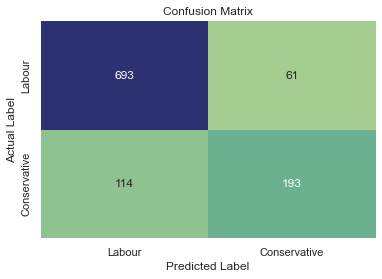

In [507]:
sns.heatmap(confusion_matrix(y_train, y_train_tlr), annot = True, fmt = 'd', cbar = False, cmap = 'crest', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


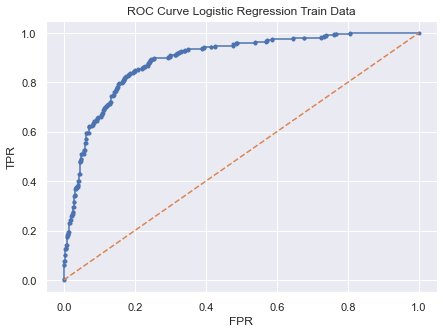

In [509]:
Y_train_predict_prob = best_lr.predict_proba(x_train)
probs = Y_train_predict_prob[:, 1]
auc_train_tlr = roc_auc_score(y_train, probs)
print('AUC =', round(auc_train_tlr, 2))
fpr_train_tlr, tpr_train_tlr, thresholds = roc_curve(y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Logistic Regression Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_tlr, tpr_train_tlr, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');


In [510]:
print(classification_report(y_test, y_test_tlr))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       303
           1       0.76      0.71      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



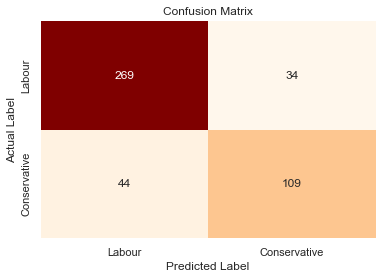

In [512]:
sns.heatmap(confusion_matrix(y_test, y_test_tlr), annot = True, fmt = 'd', cbar = False, cmap = 'OrRd', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.88


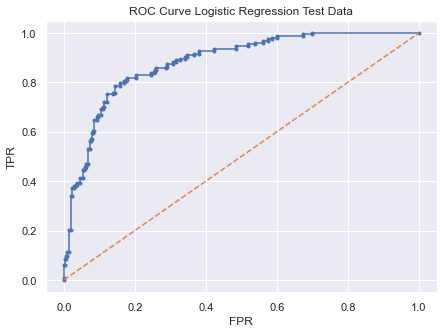

In [513]:
Y_test_predict_prob = best_lr.predict_proba(x_test)
probs = Y_test_predict_prob[:, 1]
auc_test_tlr = roc_auc_score(y_test, probs)
print('AUC =', round(auc_test_tlr, 2))
fpr_test_tlr, tpr_test_tlr, thresholds = roc_curve(y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Logistic Regression Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_tlr, tpr_test_tlr, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

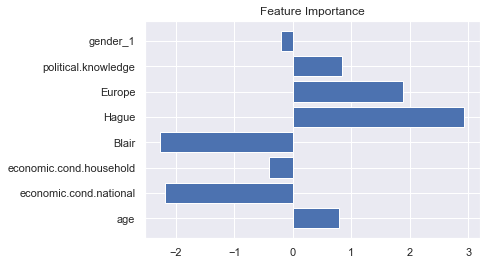

In [515]:
plt.title('Feature Importance')
plt.barh(x_train.columns, best_lr.coef_[0]);

In [516]:
train_accuracy = accuracy_score(y_train, y_train_tlr)

print(f'Training Accuracy: {train_accuracy:.7f}')

Training Accuracy: 0.8350613


In [517]:
test_accuracy = accuracy_score(y_test, y_test_tlr)

print(f'Testing Accuracy: {test_accuracy:.7f}')

Testing Accuracy: 0.8289474


In [518]:
param_grid = {'solver': ['lsqr', 'eigen', 'svd'],
              'tol': [0.1, 0.01, 0.001],
              }
model = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [521]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['lsqr', 'eigen', 'svd'],
                         'tol': [0.1, 0.01, 0.001]},
             scoring='f1')

In [522]:
grid_search.best_params_

{'solver': 'lsqr', 'tol': 0.1}

In [523]:
best_lda = grid_search.best_estimator_

In [524]:
y_train_tlda = best_lda.predict(x_train)
y_test_tlda = best_lr.predict(x_test)

In [525]:
print(classification_report(y_train, y_train_tlda))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



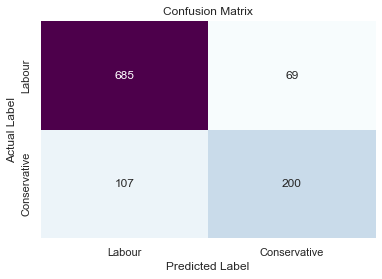

In [527]:
sns.heatmap(confusion_matrix(y_train, y_train_tlda), annot = True, fmt = 'd', cbar = False, cmap = 'BuPu', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


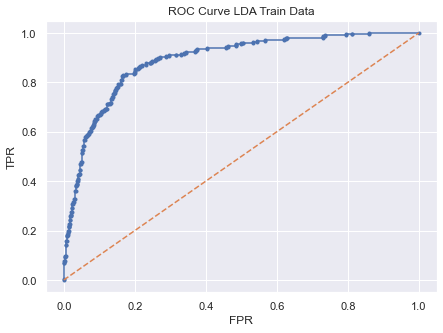

In [528]:
Y_train_predict_prob = best_lda.predict_proba(x_train)
probs = Y_train_predict_prob[:, 1]
auc_train_tlda = roc_auc_score(y_train, probs)
print('AUC =', round(auc_train_tlda, 2))
fpr_train_tlda, tpr_train_tlda, thresholds = roc_curve(y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve LDA Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_tlda, tpr_train_tlda, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

In [529]:
print(classification_report(y_test, y_test_tlda))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       303
           1       0.76      0.71      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



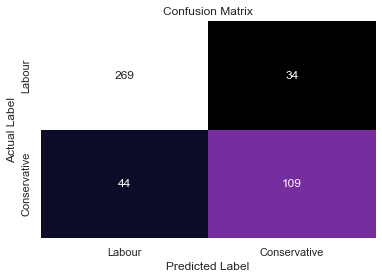

In [531]:
sns.heatmap(confusion_matrix(y_test, y_test_tlda), annot = True, fmt = 'd', cbar = False, cmap = 'CMRmap', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


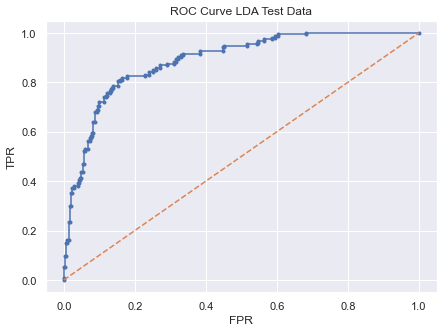

In [532]:
Y_test_predict_prob = best_lda.predict_proba(x_test)
probs = Y_test_predict_prob[:, 1]
auc_test_tlda = roc_auc_score(y_test, probs)
print('AUC =', round(auc_test_tlda, 2))
fpr_test_tlda, tpr_test_tlda, thresholds = roc_curve(y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve LDA Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_tlda, tpr_test_tlda, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

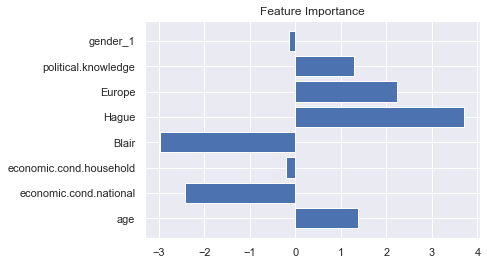

In [534]:
plt.title('Feature Importance')
plt.barh(x_train.columns, best_lda.coef_[0]);

In [535]:
train_accuracy = accuracy_score(y_train, y_train_tlda)

print(f'Training Accuracy: {train_accuracy:.7f}')

Training Accuracy: 0.8341188


In [536]:
test_accuracy = accuracy_score(y_test, y_test_tlda)

print(f'Testing Accuracy: {test_accuracy:.7f}')

Testing Accuracy: 0.8289474


In [538]:
scores_train = []
scores_test = []
for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  knn.fit(x_train, y_train)
  scores_train.append(knn.score(x_train, y_train))
  scores_test.append(knn.score(x_test, y_test))

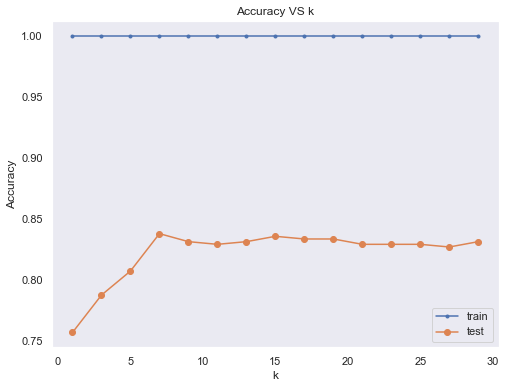

In [539]:
plt.figure(figsize = [8, 6])
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.title('Accuracy VS k')
plt.plot(range(1, 30, 2), scores_train, marker = '.', label = 'train')
plt.plot(range(1, 30, 2), scores_test, marker = 'o', label = 'test')
plt.legend()
plt.grid();

In [540]:
scores_train = []
scores_test = []
for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')    #uniform -> default
  knn.fit(x_train, y_train)
  scores_train.append(knn.score(x_train, y_train))
  scores_test.append(knn.score(x_test, y_test))

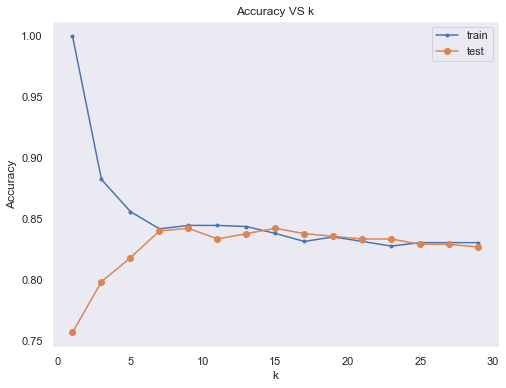

In [541]:
plt.figure(figsize = [8, 6])
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.title('Accuracy VS k')
plt.plot(range(1, 30, 2), scores_train, marker = '.', label = 'train')
plt.plot(range(1, 30, 2), scores_test, marker = 'o', label = 'test')
plt.legend()
plt.grid();

In [542]:
param_grid = {'n_neighbors': [7, 9, 13, 15]}
model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [544]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9, 13, 15]}, scoring='f1')

In [545]:
grid_search.best_params_

{'n_neighbors': 7}

In [546]:
best_knn = grid_search.best_estimator_

In [547]:
y_train_tknn = best_knn.predict(x_train)
y_test_tknn = best_knn.predict(x_test)

In [548]:
print(classification_report(y_train, y_train_tknn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.74      0.70      0.72       307

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



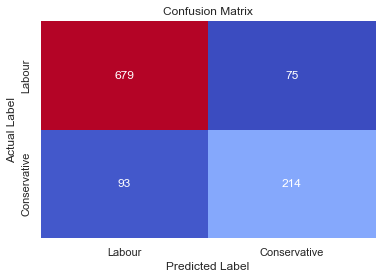

In [551]:
sns.heatmap(confusion_matrix(y_train, y_train_tknn), annot = True, fmt = 'd', cbar = False, cmap = 'coolwarm', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.92


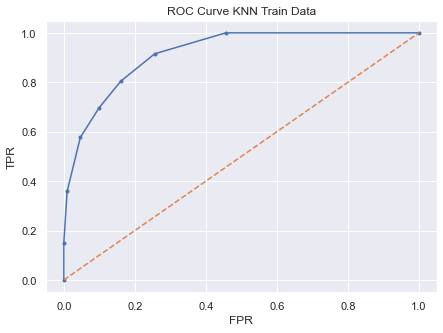

In [552]:
Y_train_predict_prob = best_knn.predict_proba(x_train)
probs = Y_train_predict_prob[:, 1]
auc_train_tknn = roc_auc_score(y_train, probs)
print('AUC =', round(auc_train_tknn, 2))
fpr_train_tknn, tpr_train_tknn, thresholds = roc_curve(y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve KNN Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_tknn, tpr_train_tknn, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

In [553]:
print(classification_report(y_test, y_test_tknn))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       303
           1       0.78      0.73      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



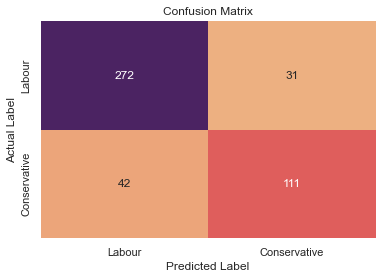

In [554]:
sns.heatmap(confusion_matrix(y_test, y_test_tknn), annot = True, fmt = 'd', cbar = False, cmap = 'flare', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


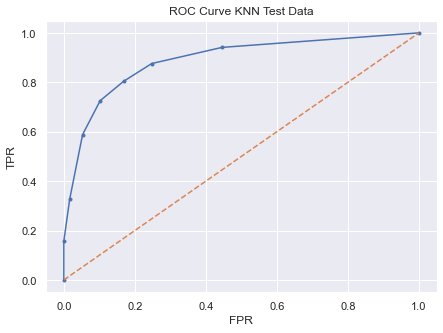

In [555]:
Y_test_predict_prob = best_knn.predict_proba(x_test)
probs = Y_test_predict_prob[:, 1]
auc_test_tknn = roc_auc_score(y_test, probs)
print('AUC =', round(auc_test_tknn, 2))
fpr_test_tknn, tpr_test_tknn, thresholds = roc_curve(y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve KNN Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_tknn, tpr_test_tknn, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

In [557]:
train_accuracy = accuracy_score(y_train, y_train_tknn)

print(f'Training Accuracy: {train_accuracy:.7f}')

Training Accuracy: 0.8416588


In [556]:
test_accuracy = accuracy_score(y_test, y_test_tlda)

print(f'Testing Accuracy: {test_accuracy:.7f}')

Testing Accuracy: 0.8399123


In [581]:
param_grid = {'n_estimators': [21, 51, 101]}
model = AdaBoostClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [582]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'n_estimators': [21, 51, 101]}, scoring='f1')

In [583]:
grid_search.best_params_

{'n_estimators': 21}

In [584]:
abcl = grid_search.best_estimator_

In [585]:
y_train_ab = abcl.predict(x_train)
y_test_ab = abcl.predict(x_test)

In [586]:
print(classification_report(y_train, y_train_ab))

              precision    recall  f1-score   support

           0       0.88      0.92      0.89       754
           1       0.77      0.68      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



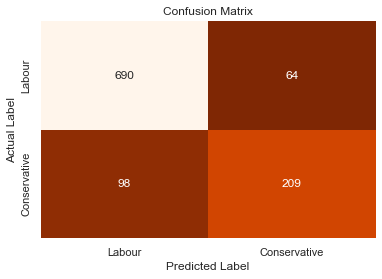

In [630]:
sns.heatmap(confusion_matrix(y_train, y_train_ab), annot = True, fmt = 'd', cbar = False, cmap = 'Oranges_r', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.91


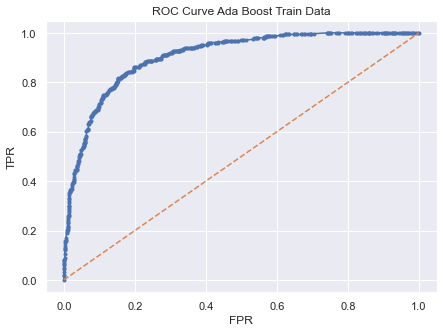

In [588]:
Y_train_predict_prob = abcl.predict_proba(x_train)
probs = Y_train_predict_prob[:, 1]
auc_train_ab = roc_auc_score(y_train, probs)
print('AUC =', round(auc_train_ab, 2))
fpr_train_ab, tpr_train_ab, thresholds = roc_curve(y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Ada Boost Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_ab, tpr_train_ab, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

In [589]:
print(classification_report(y_test, y_test_ab))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.71      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



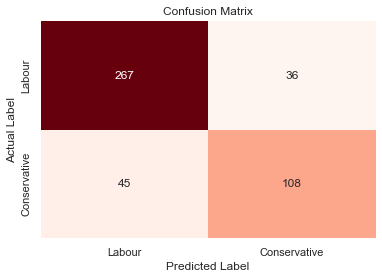

In [594]:
sns.heatmap(confusion_matrix(y_test, y_test_ab), annot = True, fmt = 'd', cbar = False, cmap = 'Reds', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.88


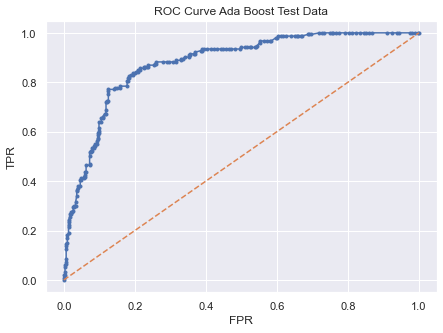

In [595]:
Y_test_predict_prob = abcl.predict_proba(x_test)
probs = Y_test_predict_prob[:, 1]
auc_test_ab = roc_auc_score(y_test, probs)
print('AUC =', round(auc_test_ab, 2))
fpr_test_ab, tpr_test_ab, thresholds = roc_curve(y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Ada Boost Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_ab, tpr_test_ab, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

In [643]:
train_accuracy = accuracy_score(y_train, y_train_ab)

print(f'Training Accuracy: {train_accuracy:.7f}')

Training Accuracy: 0.8473139


In [644]:
test_accuracy = accuracy_score(y_test, y_test_ab)

print(f'Testing Accuracy: {test_accuracy:.7f}')

Testing Accuracy: 0.8223684


In [598]:
param_grid = {'n_estimators': [21, 51, 101]}
model = GradientBoostingClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [599]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'n_estimators': [21, 51, 101]}, scoring='f1')

In [600]:
grid_search.best_params_

{'n_estimators': 51}

In [601]:
gbcl = grid_search.best_estimator_

In [602]:
y_train_gb = gbcl.predict(x_train)
y_test_gb = gbcl.predict(x_test)

In [604]:
print(classification_report(y_train, y_train_gb))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       754
           1       0.83      0.74      0.78       307

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



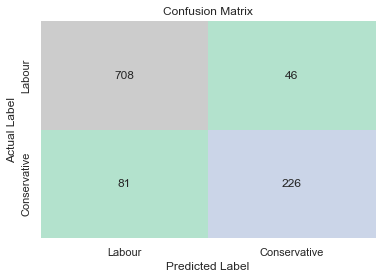

In [605]:
sns.heatmap(confusion_matrix(y_train, y_train_gb), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.94


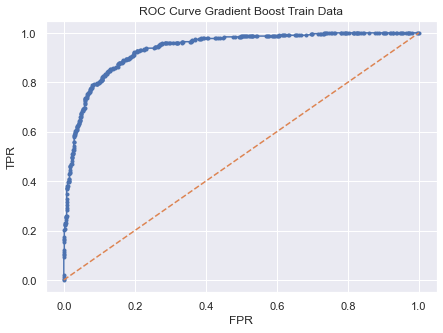

In [607]:
Y_train_predict_prob = gbcl.predict_proba(x_train)
probs = Y_train_predict_prob[:, 1]
auc_train_gb = roc_auc_score(y_train, probs)
print('AUC =', round(auc_train_gb, 2))
fpr_train_gb, tpr_train_gb, thresholds = roc_curve(y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Gradient Boost Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_gb, tpr_train_gb, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

In [608]:
print(classification_report(y_test, y_test_gb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.79      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



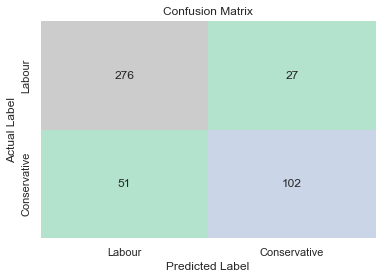

In [609]:
sns.heatmap(confusion_matrix(y_test, y_test_gb), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.9


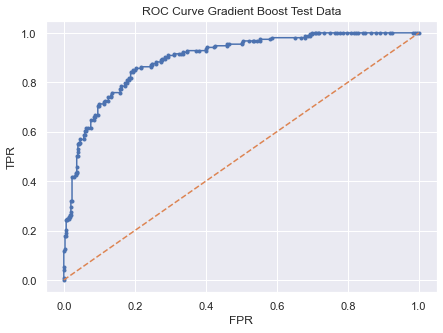

In [610]:
Y_test_predict_prob = gbcl.predict_proba(x_test)
probs = Y_test_predict_prob[:, 1]
auc_test_gb = roc_auc_score(y_test, probs)
print('AUC =', round(auc_test_gb, 2))
fpr_test_gb, tpr_test_gb, thresholds = roc_curve(y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Gradient Boost Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_gb, tpr_test_gb, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

In [611]:
model_names = ['Logistic Regression', 'LDA', 'Naive Bayes', 'KNN', 'Bagging (RF)', 'Ada Boost', 'Gradient Boost']

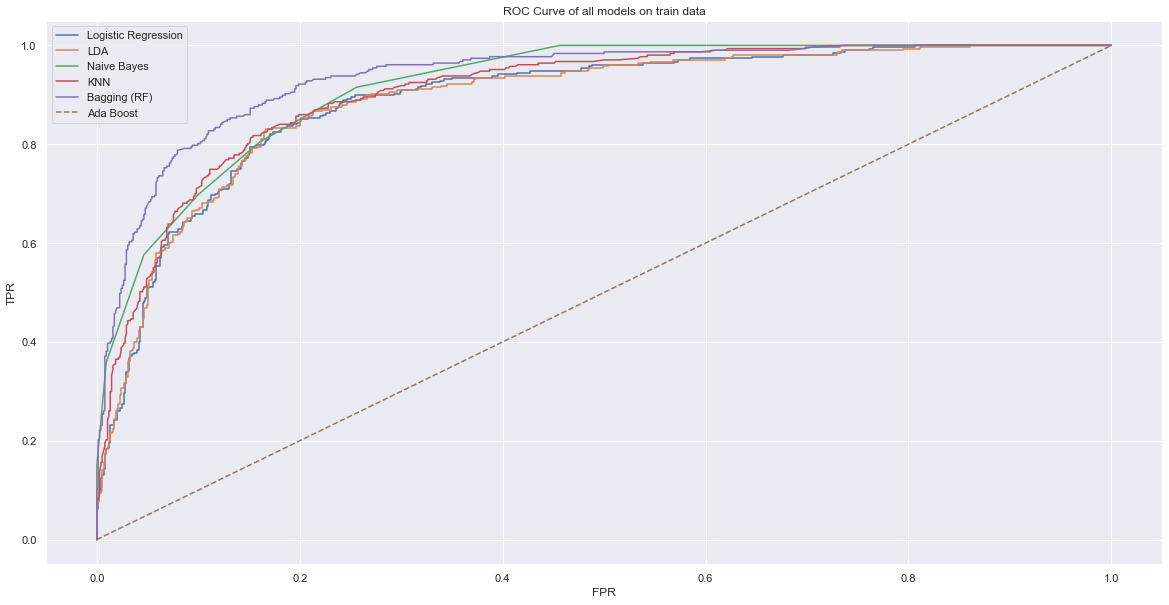

In [620]:
plt.figure(figsize = [20, 10])
plt.title('ROC Curve of all models on train data')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_train_tlr, tpr_train_tlr)
plt.plot(fpr_train_tlda, tpr_train_tlda)
plt.plot(fpr_train_tknn, tpr_train_tknn)
plt.plot(fpr_train_ab, tpr_train_ab)
plt.plot(fpr_train_gb, tpr_train_gb)
plt.plot([0,1], [0,1], linestyle = '--')

plt.legend(model_names)
plt.show()

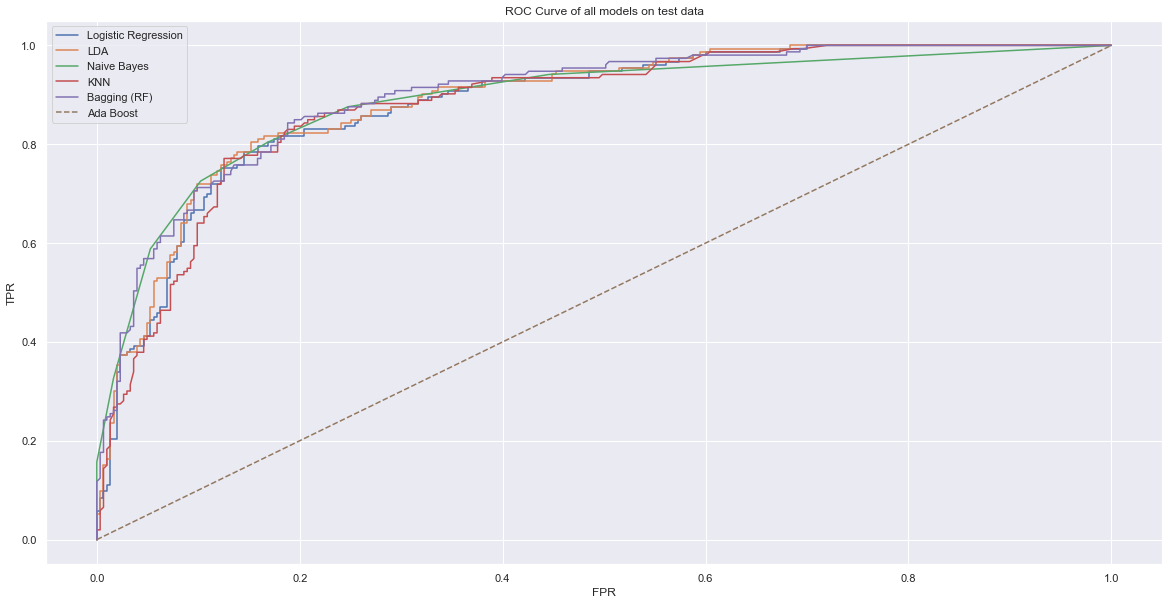

In [621]:
plt.figure(figsize = [20, 10])
plt.title('ROC Curve of all models on test data')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_test_tlr, tpr_test_tlr)
plt.plot(fpr_test_tlda, tpr_test_tlda)
plt.plot(fpr_test_tknn, tpr_test_tknn)
plt.plot(fpr_test_ab, tpr_test_ab)
plt.plot(fpr_test_gb, tpr_test_gb)
plt.plot([0,1], [0,1], linestyle = '--')

plt.legend(model_names)
plt.show()

In [642]:
conda install -c conda-forge wordcloud=1.6.0 

done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
WARNING conda.models.version:get_matcher(538): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.8.0.*, but conda is ignoring the .* and treating it as 1.8.0
WARNING conda.models.version:get_matcher(538): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.6.0.*, but conda is ignoring the .* and treating it as 1.6.0
done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your e

In [648]:
pip install wordcloud matplotlib nltk

     |████████████████████████████████| 173 kB 7.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.stem import WordNetLemmatizer
import re

from wordcloud import WordCloud

from nltk.corpus import inaugural

import warnings
warnings.filterwarnings("ignore")

In [650]:
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/apoorva/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apoorva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apoorva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apoorva/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/apoorva/nltk_data...


True

In [651]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [652]:
len(inaugural.fileids())

59

In [653]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [654]:
file_names = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

In [655]:
years = [1941, 1961, 1973]

In [656]:
names = ['Franklin D. Roosevelt', 'John F. Kennedy', 'Richard Nixon']

In [657]:
speeches = []
for i in file_names:
  speeches.append(inaugural.raw(i))

In [658]:
for i in range(0, len(file_names)):
  print("The No. of characters in President", names[i] + "'s speech in", years[i], "is", len(speeches[i]))

The No. of characters in President Franklin D. Roosevelt's speech in 1941 is 7571
The No. of characters in President John F. Kennedy's speech in 1961 is 7618
The No. of characters in President Richard Nixon's speech in 1973 is 9991


In [659]:
for i in range(0, len(file_names)):
  print("The No. of words in President", names[i] + "'s speech in", years[i], "is", len(inaugural.words(file_names[i])))

The No. of words in President Franklin D. Roosevelt's speech in 1941 is 1536
The No. of words in President John F. Kennedy's speech in 1961 is 1546
The No. of words in President Richard Nixon's speech in 1973 is 2028


In [660]:
for i in range(0, len(file_names)):
  print("The No. of sentences in President", names[i] + "'s speech in", years[i], "is", len(inaugural.sents(file_names[i])))

The No. of sentences in President Franklin D. Roosevelt's speech in 1941 is 68
The No. of sentences in President John F. Kennedy's speech in 1961 is 52
The No. of sentences in President Richard Nixon's speech in 1973 is 69


In [661]:
df = pd.DataFrame(speeches, index = names, columns = ['Speech'])
df

,Speech
Franklin D. Roosevelt,On each national day of inauguration since 178...
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [662]:
df['Speech'] = df['Speech'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df

,Speech
Franklin D. Roosevelt,on each national day of inauguration since 178...
John F. Kennedy,"vice president johnson, mr. speaker, mr. chief..."
Richard Nixon,"mr. vice president, mr. speaker, mr. chief jus..."


In [663]:
df['Speech'] = df['Speech'].str.replace('[^\w\s]', '') #removes everything except words(letters, numbers, underscore) & spaces
df

,Speech
Franklin D. Roosevelt,on each national day of inauguration since 178...
John F. Kennedy,vice president johnson mr speaker mr chief jus...
Richard Nixon,mr vice president mr speaker mr chief justice ...


In [664]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stopwords.extend(['mr', 'mrs', 'let', 'us'])
df['Speech'] = df['Speech'].apply(lambda x: ' '.join(x for x in x.split() if x not in stopwords))
df

,Speech
Franklin D. Roosevelt,national day inauguration since 1789 people re...
John F. Kennedy,vice president johnson speaker chief justice p...
Richard Nixon,vice president speaker chief justice senator c...


In [665]:
# a snippet of roosevelt's speech post stopwords removal
df.iloc[0][0]

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vit

In [666]:
df['char_count'] = df['Speech'].str.len()
df['word_count'] = df['Speech'].apply(lambda x: len(str(x).split()))
df

,Speech,char_count,word_count
Franklin D. Roosevelt,national day inauguration since 1789 people re...,4562,618
John F. Kennedy,vice president johnson speaker chief justice p...,4665,663
Richard Nixon,vice president speaker chief justice senator c...,5771,781


In [667]:
for i in range(0, len(df.index)):
  print("The top 3 words with their count in President", names[i] + "'s speech are:", nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3), '\n')

The top 3 words with their count in President Franklin D. Roosevelt's speech are: [('nation', 11), ('know', 10), ('spirit', 9)] 

The top 3 words with their count in President John F. Kennedy's speech are: [('world', 8), ('sides', 8), ('new', 7)] 

The top 3 words with their count in President Richard Nixon's speech are: [('peace', 19), ('world', 16), ('new', 15)] 



In [679]:
import re
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from nltk.tokenize import word_tokenize

import numpy as npy
from PIL import Tmage
import nltk

nltk.download('inaugural')
from nltk.corpus import inaugural

inaugural.fields()

text = re.sub(r'==.*?==+,','',text)
text=text.replace('\n','')

ImportError: cannot import name 'Tmage' from 'PIL' (/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/PIL/__init__.py)